In [1]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, transform
from scipy.ndimage.filters import gaussian_laplace, generic_filter, gaussian_filter
from matplotlib.patches import Circle 

In [2]:
scale=2
k=1.3
num_levels=13

In [3]:
def nonMaxSup_help(nums):
    middle=int(nums.shape[0]/2)
    return nums[middle] if nums[middle]==nums.max() else 0

In [4]:
def getScaleSpace(img, method):
    
    h,w=img.shape[0], img.shape[1]
    scaleSpace = np.empty((h, w, num_levels))
    
    def increaseFilterSize():
        for i in range(num_levels):
            sigma=scale*k**i
            scaleSpace[:, :, i]=((sigma**2)*gaussian_laplace(img,sigma))**2
        return scaleSpace

    def downSample():
        for i in range(num_levels):
            downsample_scale=k**i
            sampledImg=transform.resize(img, (int(h/downsample_scale), int(w/downsample_scale)))
            LoG=gaussian_laplace(sampledImg, scale) ** 2 
            scaleSpace[:, :, i] = transform.resize(LoG, (h, w))
        return scaleSpace
    
    methods = {'1': increaseFilterSize, '2': downSample}
    scaleSpace=methods[method]()
    nonMaxSup=generic_filter(scaleSpace,nonMaxSup_help, size=(3,3,3))
    return nonMaxSup



In [5]:
def plotCircles(img, scaleSpace, threshold, color='r'):
    cy,cx,idxLevel = np.where(scaleSpace > threshold)
    rad = np.empty(cy.shape[0])
    for i in range(len(idxLevel)):
        sigma = scale * k ** idxLevel[i]
        rad[i] = np.sqrt(2) * sigma
    fig=plt.figure()
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(img, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circle = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circle)
    plt.title('%i circles' % len(cx))
    plt.show()

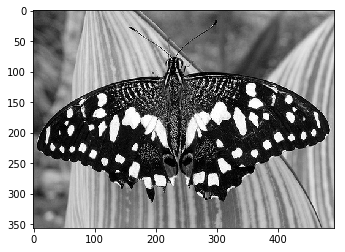

<Figure size 432x288 with 0 Axes>

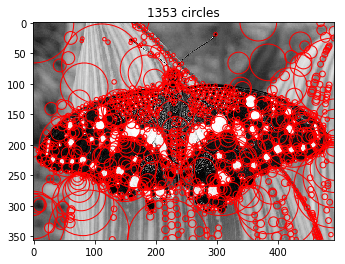

Running time for increaseFilterSize is 9.738183975219727


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

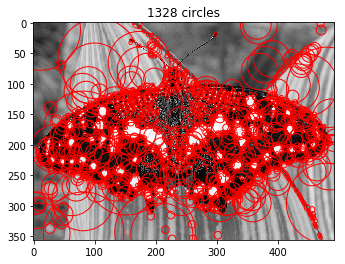

Running time for downSample is 10.05423903465271


In [6]:
img = color.rgb2gray(io.imread('part2/butterfly.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)

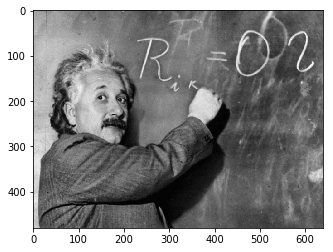

<Figure size 432x288 with 0 Axes>

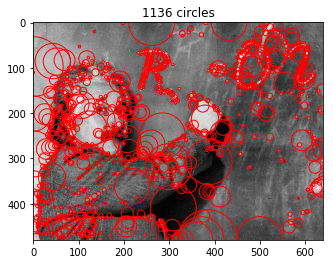

Running time for increaseFilterSize is 17.595690965652466


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

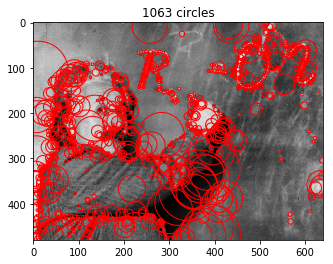

Running time for downSample is 15.930258750915527


In [7]:
img = color.rgb2gray(io.imread('part2/einstein.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.005, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.0005, color='r')
print("Running time for downSample is", time.time()-start)

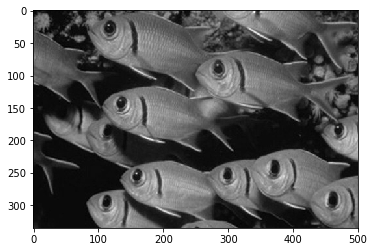

<Figure size 432x288 with 0 Axes>

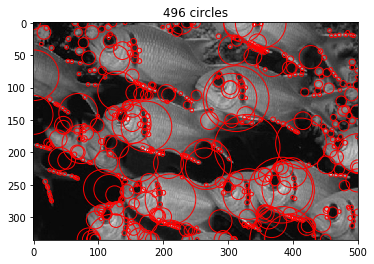

Running time for increaseFilterSize is 9.360381841659546


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

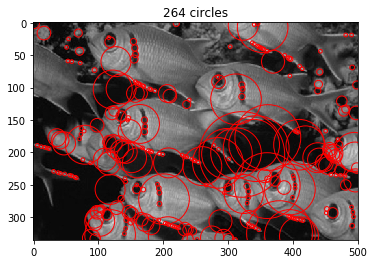

Running time for downSample is 8.778000116348267


In [8]:
img = color.rgb2gray(io.imread('part2/fishes.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)

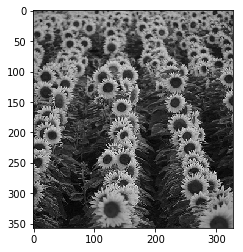

<Figure size 432x288 with 0 Axes>

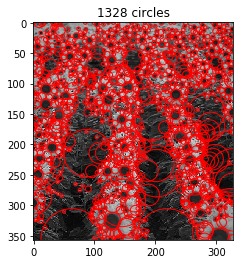

Running time for increaseFilterSize is 7.962957143783569


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

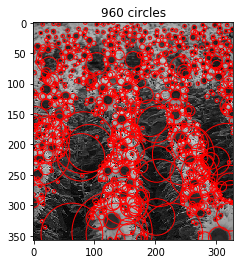

Running time for downSample is 7.626537084579468


In [9]:
img = color.rgb2gray(io.imread('part2/sunflowers.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)

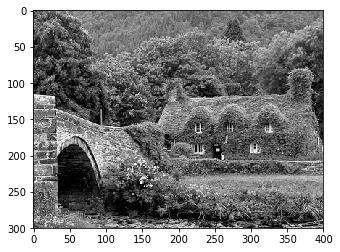

<Figure size 432x288 with 0 Axes>

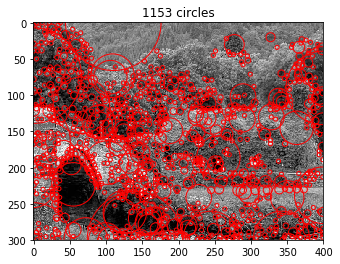

Running time for increaseFilterSize is 7.24785304069519


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

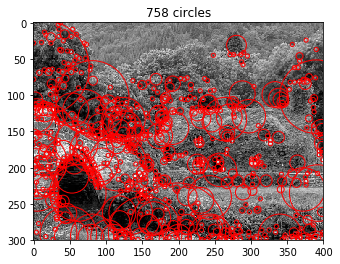

Running time for downSample is 6.476255893707275


In [10]:
img = color.rgb2gray(io.imread('part2/green.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)

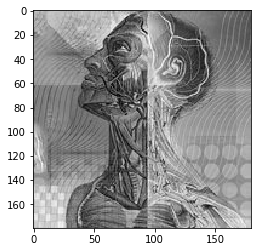

<Figure size 432x288 with 0 Axes>

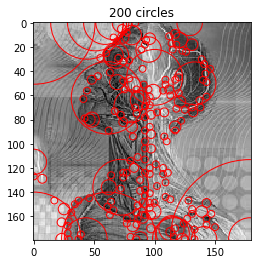

Running time for increaseFilterSize is 2.0901060104370117


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

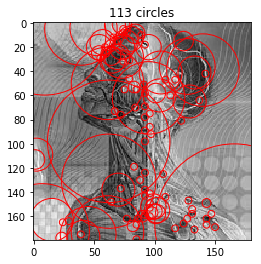

Running time for downSample is 2.187610149383545


In [11]:
img = color.rgb2gray(io.imread('part2/human.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.005, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.0005, color='r')
print("Running time for downSample is", time.time()-start)

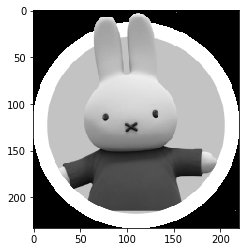

<Figure size 432x288 with 0 Axes>

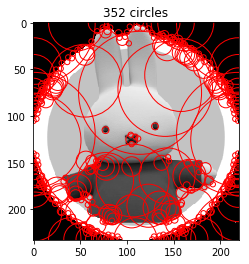

Running time for increaseFilterSize is 3.7455332279205322


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

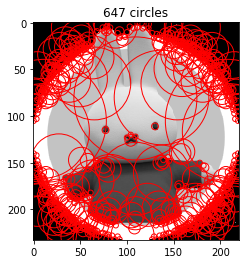

Running time for downSample is 3.1783480644226074


In [12]:
img = color.rgb2gray(io.imread('part2/rabbit.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)

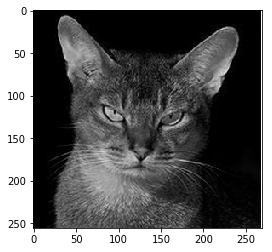

<Figure size 432x288 with 0 Axes>

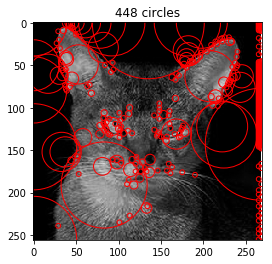

Running time for increaseFilterSize is 3.989145040512085


/Users/garethfeng/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<Figure size 432x288 with 0 Axes>

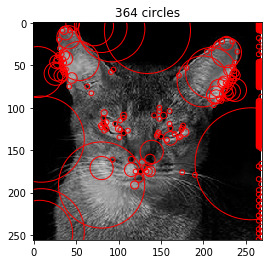

Running time for downSample is 4.022361993789673


In [13]:
img = color.rgb2gray(io.imread('part2/cat.jpg'))
plt.imshow(img, cmap='gray')

start = time.time()
scaleSpace=getScaleSpace(img, method='1')
plotCircles(img, scaleSpace, threshold=0.01, color='r')
print("Running time for increaseFilterSize is", time.time()-start)

start = time.time()
scaleSpace=getScaleSpace(img, method='2')
plotCircles(img, scaleSpace, threshold=0.001, color='r')
print("Running time for downSample is", time.time()-start)